In [407]:
import matplotlib as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [408]:
stud_df = pd.read_csv('./data/StudentsPerformance.csv')

In [409]:
stud_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [410]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [411]:
stud_df = stud_df.rename(
    columns= {
        'gender':'gender',
        'race/ethnicity':'social_group',
        'parental level of education':'parent_education',
        'lunch':'lunch',
        'test preparation course':'test_prep_course',
        'math score':'math_score',
        'reading score':'read_score',
        'writing score':'write_score'
    }
)

In [412]:
stud_df.columns

Index(['gender', 'social_group', 'parent_education', 'lunch',
       'test_prep_course', 'math_score', 'read_score', 'write_score'],
      dtype='object')

In [413]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   social_group      1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   read_score        1000 non-null   int64 
 7   write_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Adding Grade Column

In [414]:
def AverageToGrade(AverageScore):
    if (AverageScore>=80): return "A"
    if (AverageScore>=70): return "B"
    if (AverageScore>=60): return "C"
    if (AverageScore>=50): return "D"
    if (AverageScore>=40): return "E"
    else: return "F"

## Setting average

In [415]:
stud_df["average"]=stud_df[["math_score", "read_score", "write_score"]].mean(axis=1)
stud_df.head()

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [416]:
stud_df["grade"]=stud_df.apply(lambda x: AverageToGrade(x["average"]),axis=1)
stud_df.head(20)

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,E
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


<AxesSubplot:xlabel='grade', ylabel='count'>

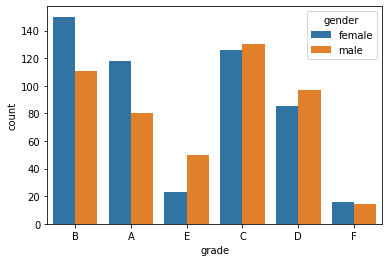

In [417]:
sns.countplot(data=stud_df, x=stud_df["grade"], hue=stud_df["gender"])

In [418]:
gender_mean = stud_df.groupby('gender')[['math_score','read_score','write_score','average']].mean().round(2)
gender_mean

,math_score,read_score,write_score,average
gender,,,,
female,63.63,72.61,72.47,69.57
male,68.73,65.47,63.31,65.84


In [419]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['','Male', 'Female'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center',
               height=40,
               font_size=20),
    cells=dict(values=[gender_mean.T.index,
                       gender_mean.T['male'],
                       gender_mean.T['female']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center',
              height=40,
              font_size= 20))
])

fig.update_layout(width=800, height=400)
fig.show()

Average: 66


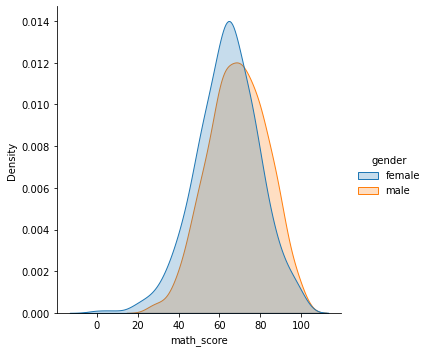

In [420]:
sns.displot(stud_df, x="math_score", hue="gender", kind="kde", fill ="true")
print("Average: %d" % stud_df['math_score'].median())

Text(0.5, 1.0, 'Average Score')

<Figure size 432x288 with 0 Axes>

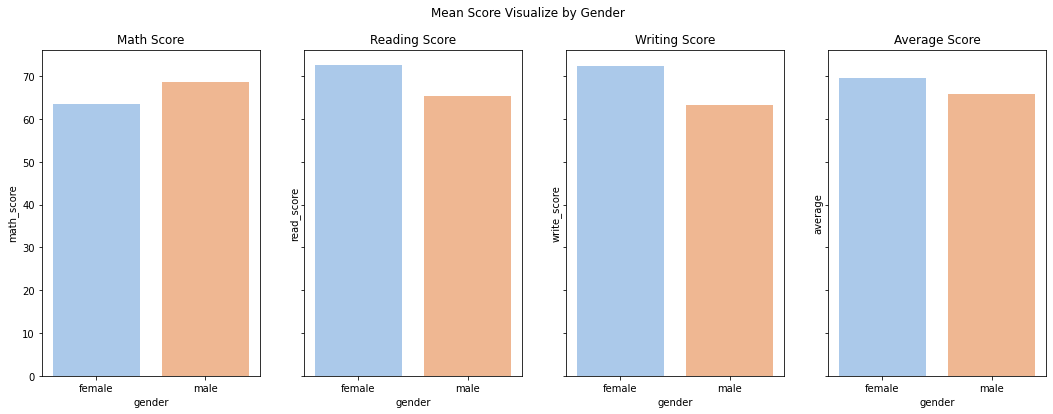

In [421]:
gender_mean.reset_index(inplace=True)
fig = plt.pyplot.figure()
gs = fig.add_gridspec(4, hspace=0)

figure, axes = plt.pyplot.subplots(1, 4, sharex=True, sharey=True, figsize=(18,6))
figure.suptitle('Mean Score Visualize by Gender')
sns.barplot(x='gender', y='math_score', data=gender_mean,palette='pastel', ax=axes[0])
axes[0].set_title('Math Score')
sns.barplot(x='gender', y='read_score', data=gender_mean,palette='pastel', ax=axes[1])
axes[1].set_title('Reading Score')
sns.barplot(x='gender', y='write_score', data=gender_mean,palette='pastel', ax=axes[2])
axes[2].set_title('Writing Score')
sns.barplot(x='gender', y='average', data=gender_mean,palette='pastel', ax=axes[3])
axes[3].set_title('Average Score')


# Explore Categorical Variables


In [422]:
unique_df = pd.DataFrame(columns=['VariableName','UniqueValues'])
object_columns = list(
        filter(
            lambda col: str(stud_df[col[1]].dtype) == 'object' , enumerate(stud_df.columns) 
        )
    )
object_columns

[(0, 'gender'),
 (1, 'social_group'),
 (2, 'parent_education'),
 (3, 'lunch'),
 (4, 'test_prep_course'),
 (9, 'grade')]

In [423]:
for col in object_columns:
    unique_df.loc[col[0],['VariableName','UniqueValues']] = [col[1], ", ".join(stud_df[col[1]].unique())]

In [424]:
pd.options.display.max_colwidth = 100

unique_df

,VariableName,UniqueValues
0,gender,"female, male"
1,social_group,"group B, group C, group A, group D, group E"
2,parent_education,"bachelor's degree, some college, master's degree, associate's degree, high school, some high school"
3,lunch,"standard, free/reduced"
4,test_prep_course,"none, completed"
9,grade,"B, A, E, C, D, F"


In [425]:
stud_df.describe()

,math_score,read_score,write_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [426]:
stud_df.describe(include='all')


,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN,6
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN,B
freq,518,319,226,645,642,NaN,NaN,NaN,NaN,261
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667,NaN
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326,NaN
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333,NaN
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333,NaN
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667,NaN


# Lebeling Categorical Variables
## social_group

0 ---> group A

1 ---> group B

2 ---> group C

3 ---> group D

4 ---> group E

## parent_education

0 ---> associate's degree

1 ---> bachelor's degree

2 ---> high school

3 ---> master's degree

4 ---> some college

5 ---> some high school

## Gender

0 ---> female

1 ---> male

## Grade
A ---> 0
B ---> 1
C ---> 2
D ---> 3
E ---> 4

In [427]:
from sklearn.preprocessing import LabelEncoder
for col in object_columns:
    lbl = LabelEncoder()
    lbl.fit(list(stud_df[col[1]].values))
    stud_df[col[1]] = lbl.transform(stud_df[col[1]].values)
        
stud_df.head(10).style.background_gradient(cmap = 'Set2') 
stud_df.describe()

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000,67.770667,1.761000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657,14.257326,1.319705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,9.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,58.333333,1.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000,68.333333,2.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,77.666667,3.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,100.000000,5.000000


In [428]:
stud_df.head(11).style.background_gradient(cmap = 'Set2') 

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,4
4,1,2,4,1,1,76,78,75,76.333333,1
5,0,1,0,1,1,71,83,78,77.333333,1
6,0,1,4,1,0,88,95,92,91.666667,0
7,1,1,4,0,1,40,43,39,40.666667,4
8,1,3,2,0,0,64,64,67,65.000000,2
9,0,1,2,0,1,38,60,50,49.333333,4


In [429]:
stud_df.to_csv('./data/new_dataset.csv')

In [430]:
new_df = pd.read_csv('./data/new_dataset.csv')
print(new_df.shape)
new_df.head()

(1000, 11)


,Unnamed: 0,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
0,0,0,1,1,1,1,72,72,74,72.666667,1
1,1,0,2,4,1,0,69,90,88,82.333333,0
2,2,0,1,3,1,1,90,95,93,92.666667,0
3,3,1,0,0,0,1,47,57,44,49.333333,4
4,4,1,2,4,1,1,76,78,75,76.333333,1


In [431]:
grade_labels = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F'
}

In [432]:
X = new_df.iloc[:,5:-2]
X.values[:10]

array([[ 1, 72, 72, 74],
       [ 0, 69, 90, 88],
       [ 1, 90, 95, 93],
       [ 1, 47, 57, 44],
       [ 1, 76, 78, 75],
       [ 1, 71, 83, 78],
       [ 0, 88, 95, 92],
       [ 1, 40, 43, 39],
       [ 0, 64, 64, 67],
       [ 1, 38, 60, 50]], dtype=int64)

In [433]:
y = new_df.iloc[:,-1]
y

0      1
1      0
2      0
3      4
4      1
      ..
995    0
996    3
997    2
998    1
999    0
Name: grade, Length: 1000, dtype: int64

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly,y_train)


7.796636133335283
[ 0.00645034 -0.02801381 -0.03181631 -0.02916363]


LinearRegression()

In [441]:
y_pred = list(map(lambda x: int(x.round()),y_pred))

In [442]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
993,2,2
859,1,1
298,4,4
553,2,2
672,1,1
...,...,...
679,2,2
722,0,0
215,0,1
653,2,2


In [444]:

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
y_pred = list(map(lambda x: int(x.round()),y_pred))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
993,2,2
859,1,1
298,4,4
553,2,2
672,1,1
...,...,...
679,2,2
722,0,0
215,0,0
653,2,1


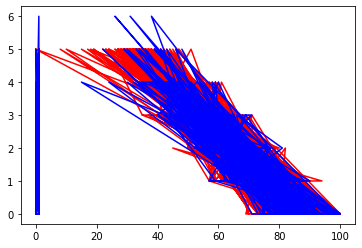

In [451]:
plt.pyplot.plot(X,y,color='red')
plt.pyplot.plot(X_test,y_pred,color='blue')
plt.pyplot.show()

In [452]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
